In [1]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# Modulo de optimización de scipy
from scipy import optimize

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

In [3]:
#Carga de dataset
data = pd.read_csv('satisfaction.csv')

# Importar libreria para dividir entrenamiento y prueba
from sklearn.model_selection import train_test_split

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   satisfaction_v2                    129880 non-null  object 
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Seat comfort                       129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Gate location                      1298

In [5]:
#llenar datos vacios
columnas_especificas = ['Arrival Delay in Minutes']
media_columnas = data[columnas_especificas].mean()
data[columnas_especificas] = data[columnas_especificas].fillna(media_columnas)

In [6]:
#variables categoricas
columnas_categoricas = data.select_dtypes(include=['object']).columns
#variables fechas
columnas_fechas = data.select_dtypes(include=['datetime64']).columns

In [8]:
#Procesamiento de frases o palabras
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   satisfaction_v2                    129880 non-null  int32  
 2   Gender                             129880 non-null  int32  
 3   Customer Type                      129880 non-null  int32  
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  int32  
 6   Class                              129880 non-null  int32  
 7   Flight Distance                    129880 non-null  int64  
 8   Seat comfort                       129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Gate location                      1298

In [10]:
#Elimino columna irrelevante
data = data.drop(columns=['id'])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction_v2                    129880 non-null  int32  
 1   Gender                             129880 non-null  int32  
 2   Customer Type                      129880 non-null  int32  
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  int32  
 5   Class                              129880 non-null  int32  
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [12]:
# Division de dataset en entrenamiento y prueba
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [13]:
# informacion de los nuevos datasets
train_data.info()
test_data.info()

#exportar nuevos datasets
train_data.to_csv("train.csv", index=False)
test_data.to_csv("test.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 103904 entries, 21413 to 121958
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction_v2                    103904 non-null  int32  
 1   Gender                             103904 non-null  int32  
 2   Customer Type                      103904 non-null  int32  
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  int32  
 5   Class                              103904 non-null  int32  
 6   Flight Distance                    103904 non-null  int64  
 7   Seat comfort                       103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Food and drink                     103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Inflight wifi service              10390

In [14]:
#Carga de dataset
data = pd.read_csv('train.csv')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction_v2                    103904 non-null  int64  
 1   Gender                             103904 non-null  int64  
 2   Customer Type                      103904 non-null  int64  
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  int64  
 5   Class                              103904 non-null  int64  
 6   Flight Distance                    103904 non-null  int64  
 7   Seat comfort                       103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Food and drink                     103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Inflight wifi service              1039

In [16]:
# Lectura de Datos
X = data.iloc[:, 1:22]
y = data.iloc[:, 0]
m = y.size

print(X)
print('*'*25)
print(y)

        Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0            0              0   65               1      1              360   
1            1              0   13               1      1             2991   
2            0              0   58               0      0             1903   
3            0              1   27               0      0             2813   
4            0              0   34               0      0             2864   
...        ...            ...  ...             ...    ...              ...   
103899       1              0   42               0      0             1710   
103900       0              0   51               0      1             2148   
103901       1              0   64               1      1             1206   
103902       0              0   22               1      1             1193   
103903       0              0   48               0      1              245   

        Seat comfort  Departure/Arrival time convenient  Food a

In [17]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [18]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

        Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0            0              0   65               1      1              360   
1            1              0   13               1      1             2991   
2            0              0   58               0      0             1903   
3            0              1   27               0      0             2813   
4            0              0   34               0      0             2864   
...        ...            ...  ...             ...    ...              ...   
103899       1              0   42               0      0             1710   
103900       0              0   51               0      1             2148   
103901       1              0   64               1      1             1206   
103902       0              0   22               1      1             1193   
103903       0              0   48               0      1              245   

        Seat comfort  Departure/Arrival time convenient  Food a

In [19]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [20]:
# Prueba la implementacion de la funcion sigmoid
z = 0
g = sigmoid(z)

print('g(', z, ') = ', g)

g( 0 ) =  0.5


In [21]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
# Agraga el termino de intercepción a A
X = np.concatenate([np.ones((m, 1)), X], axis=1)

print(X[5])

[1.000e+00 0.000e+00 0.000e+00 6.500e+01 0.000e+00 0.000e+00 2.595e+03
 5.000e+00 5.000e+00 5.000e+00 5.000e+00 5.000e+00 3.000e+00 5.000e+00
 4.000e+00 4.000e+00 4.000e+00 4.000e+00 4.000e+00 4.000e+00 2.000e+00
 0.000e+00]


In [22]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [23]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

In [24]:
#Carga de dataset
data_test = pd.read_csv('test.csv')
#print(data)

In [25]:
#seleccionando fila
fila_deseada = 100

if fila_deseada < len(data_test):
  fila_completa = data.iloc[fila_deseada].to_numpy()
  print(fila_completa)
else:
  print("La fila no existe")

[ 0.  1.  0. 47.  0.  0. 78.  3.  4.  3.  3.  4.  2.  2.  2.  2.  3.  3.
  2.  2.  2.  0.  0.]


C:\Users\hp\AppData\Local\Temp\ipykernel_12692\2268448176.py:7: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
C:\Users\hp\AppData\Local\Temp\ipykernel_12692\714609262.py:8: RuntimeWarning: overflow encountered in exp
  g = 1 / (1 + np.exp(-z))
C:\Users\hp\AppData\Local\Temp\ipykernel_12692\714609262.py:8: RuntimeWarning: overflow encountered in exp
  g = 1 / (1 + np.exp(-z))
C:\Users\hp\AppData\Local\Temp\ipykernel_12692\2268448176.py:7: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
C:\Users\hp\AppData\Local\Temp\ipykernel_12692\714609262.py:8: RuntimeWarning: overflow encountered in exp
  g = 1 / (1 + np.exp(-z))
C:\Users\hp\AppData\Local\Temp\ipykernel_12692\714609262.py:8: RuntimeWarning: overflow encountered in exp
  g = 1 / (1 + np.exp(-z))
C:\Users\hp\AppData\Local\Temp\ipykernel_12692\2268448176.py:7: RuntimeWarning: divide by zero

theta calculado por el descenso por el gradiente: [ 2.71005997e-03 -5.01048288e-02 -5.42418441e-02  8.42095249e-01
 -2.47471049e-02 -8.46323066e-02 -6.60125025e-01  1.73322077e-01
 -6.44600737e-03  9.22079285e-02 -6.89649682e-04  1.56323248e-01
  3.55256626e-01  2.59153436e-01  2.86360265e-01  2.29156345e-01
  2.02712705e-01  1.59645769e-01  1.75355027e-01  1.57467792e-01
  2.25902093e-01 -9.27868832e-01]


C:\Users\hp\AppData\Local\Temp\ipykernel_12692\2268448176.py:7: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
C:\Users\hp\AppData\Local\Temp\ipykernel_12692\714609262.py:8: RuntimeWarning: overflow encountered in exp
  g = 1 / (1 + np.exp(-z))
C:\Users\hp\AppData\Local\Temp\ipykernel_12692\714609262.py:8: RuntimeWarning: overflow encountered in exp
  g = 1 / (1 + np.exp(-z))
C:\Users\hp\AppData\Local\Temp\ipykernel_12692\2268448176.py:7: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
C:\Users\hp\AppData\Local\Temp\ipykernel_12692\714609262.py:8: RuntimeWarning: overflow encountered in exp
  g = 1 / (1 + np.exp(-z))


ValueError: shapes (23,) and (22,) not aligned: 23 (dim 0) != 22 (dim 0)

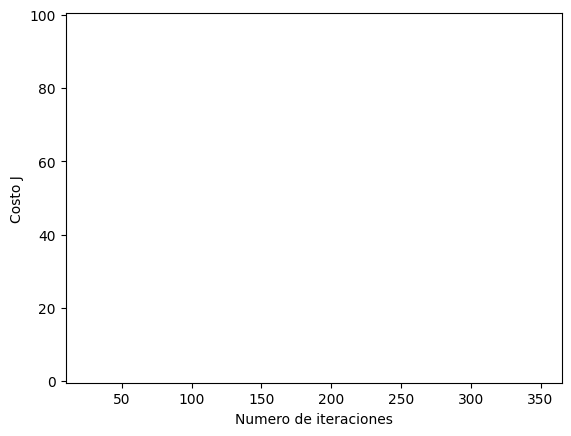

In [31]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 1000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(22)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# verificar si ingresa o no a la universidad
X_array = [1,0.,1.,0.,47.,0.,0.,78.,3.,4.,3.,3.,4.,2.,2.,2.,2.,3.,3.,2.,2.,2.,0.]

aprueba = sigmoid(np.dot(X_array, theta))   # Se debe cambiar esto

print(f"(usando el descenso por el gradiente):{aprueba}")

if aprueba > 0.5: print('Existe mucha probabilidad de satisfaccion')
else: print('Las posibilidades de satisfaccion son muy bajas')